In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'data\alphabet.csv')
data

,dist_20_0,dist_16_0,dist_12_0,dist_8_0,dist_4_0,dist_20_16,dist_16_12,dist_12_8,dist_8_4,label
0,49.024784,31.035207,49.443554,110.101010,129.158331,26.182262,26.409017,61.235759,19.586999,0
1,48.290193,35.370848,49.501759,99.344606,136.790507,27.421204,25.415429,50.800759,37.518808,0
2,50.664792,42.412037,56.252180,121.066225,136.802089,27.056595,21.351022,66.157718,18.688935,0
3,62.128068,51.626757,69.487509,110.456872,166.666018,21.671073,22.792934,42.155715,56.255131,0
4,55.756668,40.384440,49.296863,103.819132,156.374861,24.334537,20.205176,55.207995,52.652940,0
...,...,...,...,...,...,...,...,...,...,...
4394,179.181235,42.765284,52.525154,79.894573,157.572829,137.072747,22.761293,29.096736,91.539737,23
4395,161.995430,40.754767,46.570676,70.616096,139.248209,125.470419,14.738152,26.990024,76.703777,23
4396,164.749568,48.148963,53.680982,77.502896,140.443460,118.276138,19.204475,26.704825,75.949258,23
4397,170.304454,46.646010,46.584863,78.367235,146.164721,126.811375,14.909768,32.810842,83.228421,23


In [2]:
# Save class labels and number of classes
labels = data["label"].values
n_classes = len(np.unique(labels))
print(np.unique(labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [4]:
classes = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'K',
    10: 'L',
    11: 'M',
    12: 'N',
    13: 'O',
    14: 'P',
    15: 'Q',
    16: 'R',
    17: 'S',
    18: 'T',
    19: 'U',
    20: 'V',
    21: 'W',
    22: 'X',
    23: 'Y'
}
signs = [v for k, v in classes.items()]

<Axes: ylabel='count'>

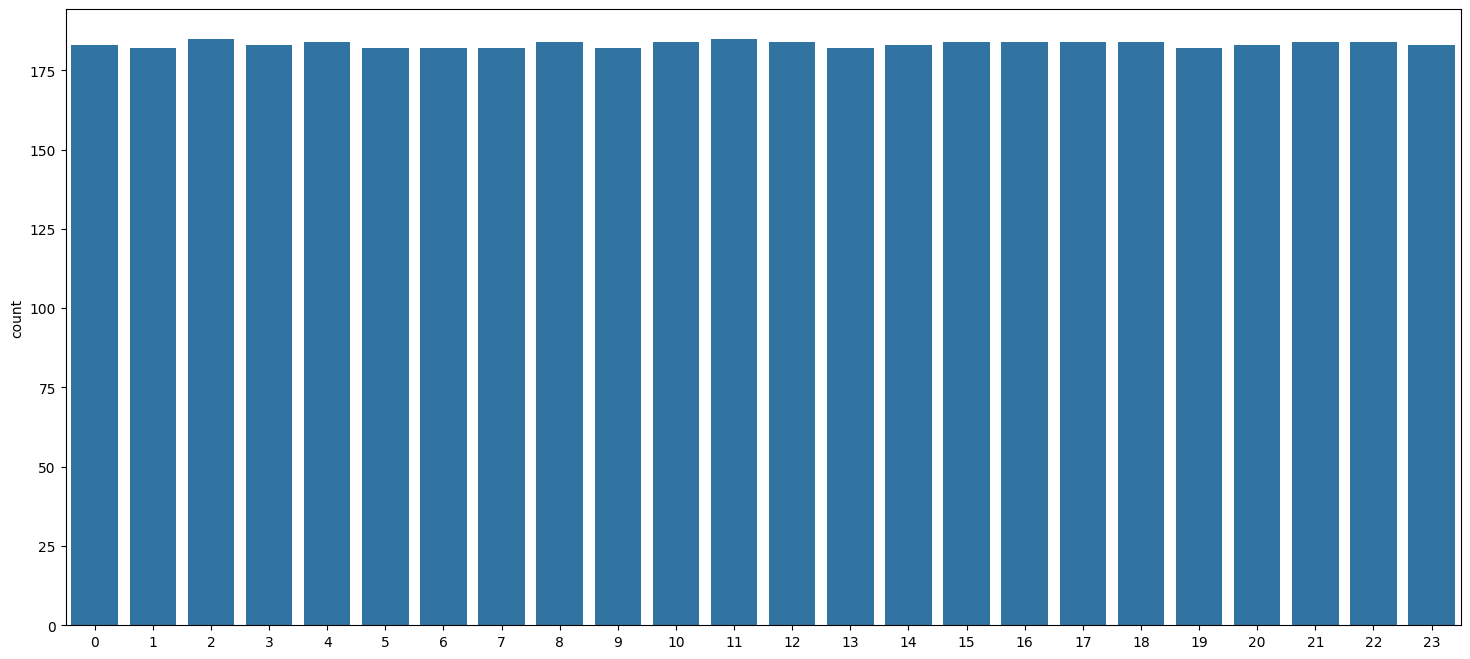

In [5]:
# Plot distribution of "labels"
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [6]:
X = data.drop(['label'], axis=1).copy()
y = data.pop('label').copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (3299, 9)
y_train shape = (3299,)
X_test shape = (1100, 9)
y_test shape = (1100,)


In [7]:
# train model using Naive Bayess
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [8]:
score = clf.score(X_test, y_test)
print("Score = {:.2f}%".format(score * 100))

Score = 95.00%


In [9]:
# Import pickle model to save the model to disk
import joblib

# save the full pipeline to disk
joblib.dump(clf, 'models\\gesture_clf.pkl', compress=True)

['models\\gesture_clf.pkl']